# Comparing different movie rating systems

In [78]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
movies = pd.read_csv('fandango_score_comparison.csv')

In [6]:
movies.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [57]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [8]:
# Check the movie data structure
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


## Fandango stars histogram

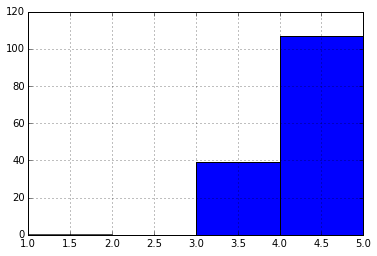

In [9]:
movies["Fandango_Stars"].hist(bins=[1,2,3,4,5])

## Metacritic (normed and rounded to the closest 0.5) histogram

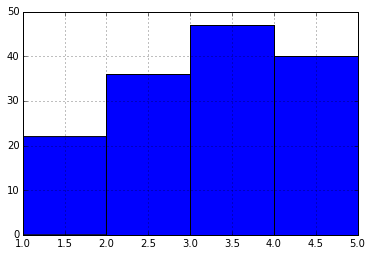

In [10]:
movies["Metacritic_norm_round"].hist(bins=[1,2,3,4,5])

## Some comparison metrics for Metacritic and Fandango ratings

In [11]:
# Mean, standard deviation, median and other quantiles 
movies[["Metacritic_norm_round","Fandango_Stars"]].describe()

,Metacritic_norm_round,Fandango_Stars
count,146.000000,146.000000
mean,2.972603,4.089041
std,0.990961,0.540386
min,0.500000,3.000000
25%,2.125000,3.500000
50%,3.000000,4.000000
75%,4.000000,4.500000
max,4.500000,5.000000


### Major differences between Fandango and Metacritic ratings

* Fandango lowest rating is 3.0 whereas Metacritic could go as low as 0.5 
* The rating for Fandango are rounded to the closest 0.5 point above
* The mean for Fandango is higher than its median which could mean there are more large ratings 
* The opposite is true for Metacritic ratings
* There is less variability in the Fandango ratings (0.54 std) than the Metacritic ones (0.99 std) 

=> The Fandango rating system seems **biased**, **flawed** and thus of **lesser value** than the Metacritic one.

## Scatter plot between Fandango and Metacritic ratings

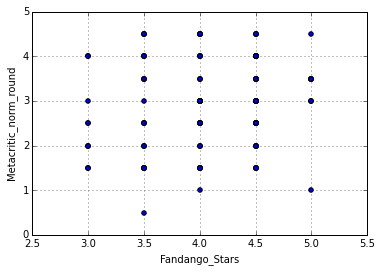

In [14]:
movies.plot(x='Fandango_Stars', 
            y='Metacritic_norm_round',
            kind='scatter')

## Finding the 5 movies with the biggest rating differences (in absolute values)

In [28]:
def abs_diff(row):
    return np.abs(row[0] - row[1])
fm_diff = movies[["Metacritic_norm_round","Fandango_Stars"]].apply(
    lambda row: abs_diff(row), axis=1)

In [30]:
fm_diff.sort(ascending=False)

In [45]:
differently_rated_movies = movies.loc[fm_diff.head().index]["FILM"]
differently_rated_movies = '\n'.join(differently_rated_movies.values)

In [46]:
print("""The top 5 differently rated  movies are: \n{0}""".format(differently_rated_movies))  


The top 5 differently rated  movies are: 
Do You Believe? (2015)
Taken 3 (2015)
The Longest Ride (2015)
Annie (2014)
Pixels (2015)


## Correlation analysis between Fandango and Metacritic ratings

In [55]:
x = movies["Metacritic_norm_round"]
y = movies["Fandango_Stars"]
correlation, p_value = sps.pearsonr(x, y)
correlation_message = "The correlation between Metacritic and Fandango ratings is {0} for a p-value of {1}"
print(correlation_message.format(correlation, p_value))

The correlation between Metacritic and Fandango ratings is 0.17844919073895918 for a p-value of 0.031161516228523815


=> The low correlation (which is significant at an $alpha=0.05$ level) might mean that the two ratings systems are independent (this is of course just an assumption which is generally false). 
This is why for the next part we will analyse a linear regression model between both.

## Linear regression between the two ratings systems

In [65]:
slope, intercept, _, _,stderr = sps.linregress(x,y)

## Predict the Fandango rating given a Metacritic one

In [75]:
def make_prediction(x):
    return slope * x + intercept

metacritic_rating = 3.0
fandango_predicted_rating = make_prediction(metacritic_rating)
prediction_message = "The Fandango rating for a {0} Metacritic one is: {1}"
print(prediction_message.format(metacritic_rating, 
                                fandango_predicted_rating))

The Fandango rating for a 3.0 Metacritic one is: 4.091707152821204


## A scatter plot + fitted regression line

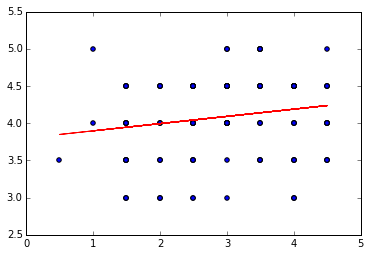

In [88]:
fandango_predicted_ratings = list(map(make_prediction, 
                                      x))
plt.scatter(x, y)
plt.plot(x, fandango_predicted_ratings, color='red')

## Display the residuals distribution of the fitted Fandango ratings

In [153]:
# Construct a Gaussian curve using the mean and std of the Fandango 
# residuals
np.random.seed(314159265)
min_res = fandango_ratings_residuals.min()
max_res = fandango_ratings_residuals.max()
linear_space = np.linspace(min_res, max_res, 
                           len(fandango_ratings_residuals))
mean = fandango_ratings_residuals.mean()
std = fandango_ratings_residuals.std()
normal_residuals = sps.norm.pdf(linear_space, mean, std)

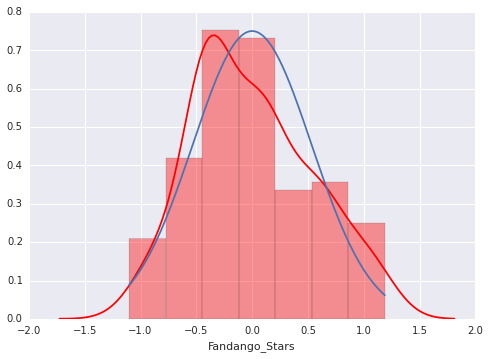

In [154]:
import seaborn as sns
fandango_ratings_residuals = fandango_predicted_ratings - y
def IQR(x):
    return np.ediff1d(x.quantile([0.25, 0.75]))
def optimal_bins_width(x):
    return 2 * IQR(x) / (len(x) ** (1/3))
def optimal_bins_number(x):
    return (x.max() - x.min()) / optimal_bins_width(x)
bins = int(optimal_bins_number(fandango_ratings_residuals))
sns.distplot(fandango_ratings_residuals, bins=bins, color="r")
plt.plot(linear_space, normal_residuals)

=> The residuals doesn't seem to be drawn from a **Gaussian** distribution. Let's test this assumption.

## Testing the normality of the residuals

In [159]:
_, normality_p_value = sps.normaltest(fandango_ratings_residuals)

In [160]:
normality_p_value

0.029984190318971815

=> The fandango residuals are thus **normal** at 
$alpha=0.05$ level but not at $alpha=0.01$ one.

## To end out investigation, a qqplot

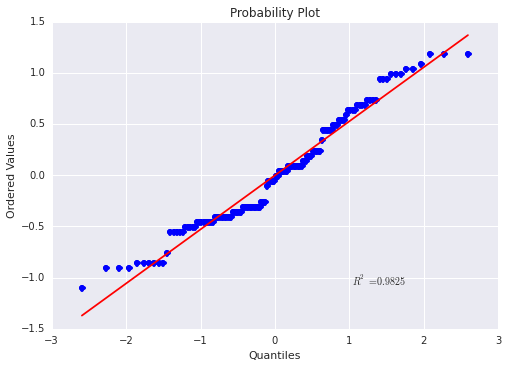

In [167]:
sps.probplot(fandango_ratings_residuals, dist="norm", plot=plt)
plt.show()